In [3]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [4]:
# Use some landsat 8 images:
date = '2014-01-25'
url = 'http://landsat-pds.s3.amazonaws.com/c1/L8/169/056/LC08_L1TP_169056_20140125_20170426_01_T1/'

swir1_band = 'LC08_L1TP_169056_20140125_20170426_01_T1_B{}.TIF'.format(6)
nir_band = 'LC08_L1TP_169056_20140125_20170426_01_T1_B{}.TIF'.format(5)
red_band = 'LC08_L1TP_169056_20140125_20170426_01_T1_B{}.TIF'.format(4)
green_band = 'LC08_L1TP_169056_20140125_20170426_01_T1_B{}.TIF'.format(3)
blue_band = 'LC08_L1TP_169056_20140125_20170426_01_T1_B{}.TIF'.format(2)

In [5]:
with rasterio.open(url+swir1_band) as src:
    profile = src.profile
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    print('Decimation factor= {}'.format(oview))
    swir1_band = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))     

Decimation factor= 9


The decimation factor is usually an integer or a rational fraction greater than one. This factor multiplies the sampling time or, equivalently, divides the sampling rate. For example, if 16-bit compact disc audio (sampled at 44,100 Hz) is decimated to 22,050 Hz, the audio is said to be decimated by a factor of 2.

In [6]:
with rasterio.open(url+nir_band) as src:
    profile = src.profile
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[-1]  # Use second-highest resolution overview
    print('Decimation factor= {}'.format(oview))
    nir_band = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))     

Decimation factor= 81


In [7]:
with rasterio.open(url+red_band) as src:
    profile = src.profile
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[-2]  # Use second-highest resolution overview
    print('Decimation factor= {}'.format(oview))
    red_band = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))     

Decimation factor= 27


In [8]:
with rasterio.open(url+green_band) as src:
    profile = src.profile
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[-3]  # Use second-highest resolution overview
    print('Decimation factor= {}'.format(oview))
    green_band = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))     

Decimation factor= 9


In [9]:
with rasterio.open(url+blue_band) as src:
    profile = src.profile
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[-4]  # Use second-highest resolution overview
    print('Decimation factor= {}'.format(oview))
    blue_band = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))     

Decimation factor= 3


In [10]:
red_band.shape

(287, 281)

In [11]:
nir_band.shape

(95, 93)

In [12]:
swir1_band.shape

(862, 844)

In [13]:
blue_band.shape

(2587, 2533)

In [14]:
green_band.shape

(862, 844)

### Visualize the band data

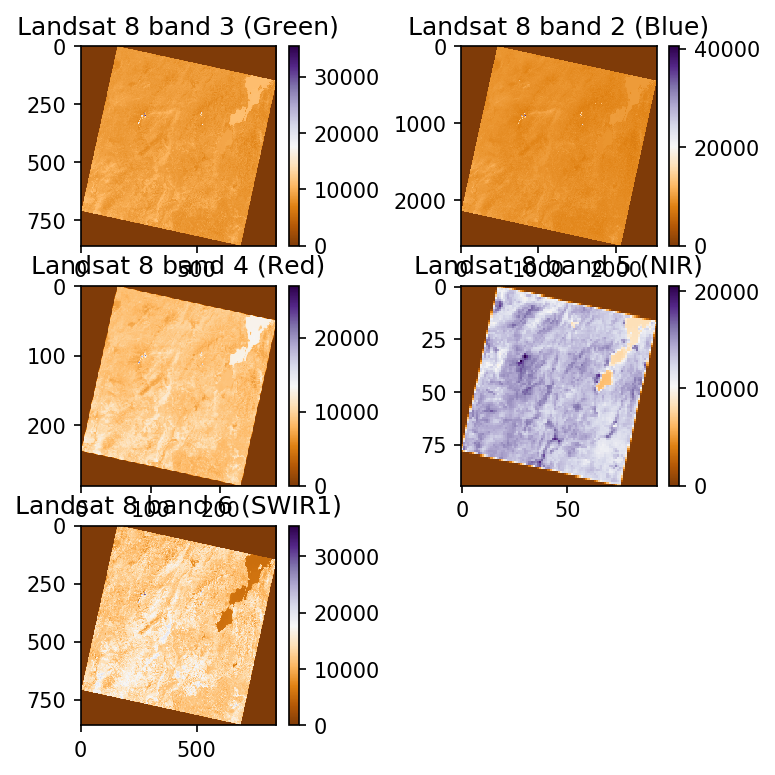

In [20]:
plt.figure(figsize=(6,6), dpi=150)

plt.subplot(3,2,1)
plt.title('Landsat 8 band 3 (Green)')
plt.imshow(green_band, cmap='PuOr')
plt.colorbar(fraction=0.046, pad=0.04)

plt.subplot(3,2,2)
plt.title('Landsat 8 band 2 (Blue)')
plt.imshow(blue_band, cmap='PuOr')
plt.colorbar(fraction=0.046, pad=0.04)

plt.subplot(3,2,3)
plt.title('Landsat 8 band 4 (Red)')
plt.imshow(red_band, cmap='PuOr')
plt.colorbar(fraction=0.046, pad=0.04)

plt.subplot(3,2,4)
plt.title('Landsat 8 band 5 (NIR)')
plt.imshow(nir_band, cmap='PuOr')
plt.colorbar(fraction=0.046, pad=0.04)

plt.subplot(3,2,5)
plt.title('Landsat 8 band 6 (SWIR1)')
plt.imshow(swir1_band, cmap='PuOr')
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

In [16]:
import earthpy.spatial as es

In [17]:
colors = ['r', 'g', 'b', 'k', 'y']
titles = ['red_band', 'green_band', 'blue_band', 'nir_band', 'swir1_band']
es.hist(url, colors=colors, title=titles, cols=2)

AttributeError: module 'earthpy.spatial' has no attribute 'hist'